# MNIST Digit Classification with a Fully-Connected Neural Network
*By Carlos Santiago Bañón*

**Year:** 2020

**Technologies:** Python, NumPy, Matplotlib, TensforFlow, Keras

**Discipline(s):** Computer Vision, Deep Learning

**Keywords:** `classification`, `computer-vision`, `deep-learning`, `fully-connected`, `mnist`, `multi-class-classification`, `neural-network`

This notebook presents an MNIST digit classifier built with a fully-connected neural network in TensorFlow and Keras.

## 1. Import Statements

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf

## 2. Data Preprocessing

---



The first step is to preprocess our data. Here, we load the MNIST digit dataset from the Keras datasets library, split it into training and test sets, reshape the matrices, and encode the labels categorically.

In [2]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

In [3]:
# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

In [4]:
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255

In [5]:
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST digit.

In [6]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 784)
Testing Images: (10000, 784)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


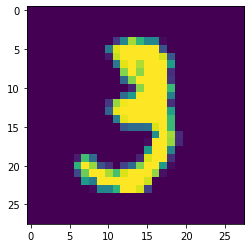

In [7]:
# Show a sample MNIST digit.
plt.imshow(train_images[10])
plt.show()

## 3. Neural Network

---



### 3.1. Define the Model

We then have to define our neural network. Here, we define a sequential model with two fully-connected layers.

In [8]:
# Define the sequential model.
model = tf.keras.models.Sequential()

In [9]:
# Add two fully-connected layers to the network.
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
# Show the model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [11]:
# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 3.2. Train the Model

We then train the model on 10 epochs, using a batch size of 256.

In [12]:
# Define the parameters.
num_epochs = 10
batch_size = 256

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3303 - accuracy: 0.9073 - val_loss: 0.1642 - val_accuracy: 0.9520
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1390 - accuracy: 0.9602 - val_loss: 0.1128 - val_accuracy: 0.9656
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0939 - accuracy: 0.9735 - val_loss: 0.0883 - val_accuracy: 0.9728
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0683 - accuracy: 0.9810 - val_loss: 0.0774 - val_accuracy: 0.9752
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0525 - accuracy: 0.9859 - val_loss: 0.0737 - val_accuracy: 0.9775
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0401 - accuracy: 0.9890 - val_loss: 0.0700 - val_accuracy: 0.9784
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0319 - accuracy: 0.9917 - val_loss: 0.0624 - val_accuracy: 0.9804

### 3.3. Display the Metrics

Finally, we display the metrics. We begin by displaying the model's accuracy and loss based on the test set.

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0602 - accuracy: 0.9815
Test Accuracy: 0.9815000295639038
Test Loss: 0.06018499284982681


Then, we save the metric values for each epoch to plot the loss and accuracy curves for our model.

In [14]:
# Save the metrics.
metrics = history.history

Finally, once we have our metric history, we can plot the curves.

In [15]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

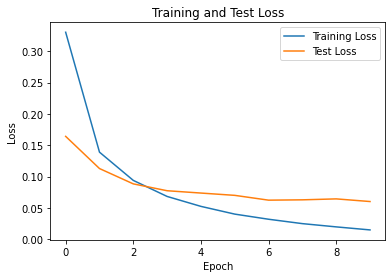

In [16]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [17]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

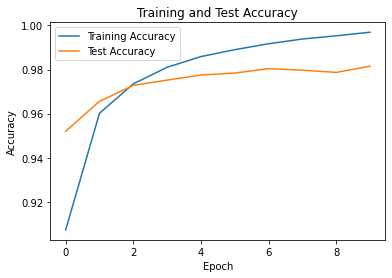

In [18]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [19]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

Finally, we can show a random test image with its corresponding prediction.

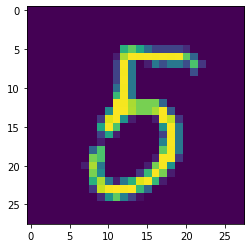

In [20]:
# Choose an index.
index = 45

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [21]:
print("Prediction:", np.argmax(predictions[index]))

Prediction: 5
